## Functional annotation of TotalRNA against NCyc

This notebook is part of the analysis of the TotalRNA   mRNA genes from Trinity. It was run by Curro 8/17/2023.

First, check dependencies. Safe to ignore. If any error, you can create a new conda enviroment with:

```bash
mamba create -n diamond_jupyter jupyterlab diamond pandas python=3 -c conda-forge  -c bioconda
```

In [ ]:
%%bash
diamond --version
python -c "import pandas; print(pandas.__version__)"
python -c "import matplotlib; print(matplotlib.__version__)"
bash --version | head -n 1

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import os

The input is the fasta file of the TotalRNA mRNA genes from Trinity and the count table. 

In [59]:
trinity_file = "../ncRNA_filtered_Trinity.fasta"
count_table = "../mRNA_soil_AbundanceFiltered.tsv"
## Sanity check: trinity and count table exit
assert os.path.exists(trinity_file), "Trinity file does not exist"
assert os.path.exists(count_table), "Count table does not exist"

## Run Diamond 

In [60]:
database = '/Databases/NCyc/NCyc_100.dmnd'
outfile_matches = 'NCyc_matches_diamond.tsv'

In [62]:
%%bash -s "$database" "$trinity_file" "$outfile_matches"
if [ ! -f $3 ]; then
diamond blastx -p 50 --ultra-sensitive -d $1 -q $2 -o $3 2> /dev/null
fi
head $3

TRINITY_DN215024_c0_g1_i1	A0A0Q9JB72	39.0	59	35	1	39	212	377	435	1.22e-06	46.2
TRINITY_DN215024_c0_g1_i1	A0A0Q5YP25	34.4	61	39	1	39	218	370	430	1.86e-04	40.0
TRINITY_DN215024_c0_g1_i1	A0A0Q4ZBA3	32.3	62	41	1	36	218	370	431	1.86e-04	40.0
TRINITY_DN215024_c0_g1_i1	A5EJ55	42.6	47	26	1	39	176	381	427	6.53e-04	38.5
TRINITY_DN215024_c0_g1_i1	2f5f349bcbf2cf647e59e4909e721e38	42.6	47	26	1	39	176	432	478	6.55e-04	38.5
TRINITY_DN215024_c0_g1_i1	7464c8f8ea00878b88277056449ebd16	42.6	47	26	1	39	176	432	478	6.55e-04	38.5
TRINITY_DN215024_c0_g1_i1	A9B6T0	40.7	54	31	1	51	209	320	373	8.90e-04	38.1
TRINITY_DN202184_c0_g1_i1	256371069	55.6	54	19	1	141	302	1	49	2.82e-07	49.3
TRINITY_DN202184_c0_g1_i1	15807683	67.7	31	10	0	150	242	32	62	3.44e-06	46.2
TRINITY_DN202184_c0_g1_i1	a5082e2ab53b165f8771d63b5a04f7e8	57.1	42	18	0	150	275	9	50	5.57e-06	45.4


## Parse Diamond output and preprocess

In [63]:
diamond = pd.read_csv(
    outfile_matches, delimiter='\t',comment='#', header=None,
    names= ['Query id', 'Subject id', '% identity', 'alignment length', 
             'mismatches','gap openings','q. start', 'q. end',
             's. start', 's. end', 'e-value', 'score'
            ]
)

Now, we have a table with all the alignments between our "genes" and the database.

In [64]:
diamond

,Query id,Subject id,% identity,alignment length,mismatches,gap openings,q. start,q. end,s. start,s. end,e-value,score
0,TRINITY_DN215024_c0_g1_i1,A0A0Q9JB72,39.0,59,35,1,39,212,377,435,1.220000e-06,46.2
1,TRINITY_DN215024_c0_g1_i1,A0A0Q5YP25,34.4,61,39,1,39,218,370,430,1.860000e-04,40.0
2,TRINITY_DN215024_c0_g1_i1,A0A0Q4ZBA3,32.3,62,41,1,36,218,370,431,1.860000e-04,40.0
3,TRINITY_DN215024_c0_g1_i1,A5EJ55,42.6,47,26,1,39,176,381,427,6.530000e-04,38.5
4,TRINITY_DN215024_c0_g1_i1,2f5f349bcbf2cf647e59e4909e721e38,42.6,47,26,1,39,176,432,478,6.550000e-04,38.5
...,...,...,...,...,...,...,...,...,...,...,...,...
3575,TRINITY_DN415840_c0_g1_i1,A0A143QK25,73.8,61,16,0,7,189,80,140,1.190000e-23,94.4
3576,TRINITY_DN415840_c0_g1_i1,A0A165LM56,73.8,61,16,0,7,189,80,140,1.190000e-23,94.4
3577,TRINITY_DN415840_c0_g1_i1,D2B8B4,69.1,68,21,0,1,204,38,105,1.620000e-23,94.0
3578,TRINITY_DN415840_c0_g1_i1,K7SK03,69.2,65,20,0,1,195,35,99,1.620000e-23,94.0


## Read count table
However, we also need to read the count table:

In [65]:
%%bash -s "$count_table"
head $1

ContigID	ML5	ML18	ML21	ML20	ML29	ML25	ML1	ML24	ML13	ML19	ML17	ML16	ML6	ML27	ML8	ML14	ML9	ML22	ML4	ML23	ML11	ML26	ML30	ML12	ML3	ML10	ML2	ML28	ML15	ML7
TRINITY_DN114685_c0_g1_i1	10	0	0	0	1	0	8	0	16	0	0	2	18	0	12	4	18	0	0	0	132	11	0	20	14	16	10	0	6	0
TRINITY_DN5918_c0_g4_i1	188	326	0	0	32	130	437	8	93	3	213	314	161	0	180	84	103	44	50	15	72	68	20	102	346	156	182	3	207	125
TRINITY_DN558_c0_g2_i2	3	67	0	0	22	39	18	14	9	0	50	29	10	1	4	3	7	35	3	6	7	9	18	15	15	12	21	0	14	42
TRINITY_DN1239_c0_g1_i3	60	40	0	0	21	34	98	2	18	0	53	21	78	0	28	8	12	111	8	2	15	10	16	21	70	41	54	0	25	44
TRINITY_DN405074_c0_g1_i1	1	10	0	0	2	1	14	18	0	0	8	15	5	0	2	6	2	2	0	14	0	2	7	1	2	1	1	0	5	4
TRINITY_DN41560_c1_g2_i1	84	112	0	0	22	60	167	7	59	5	74	172	71	0	62	45	37	30	24	19	33	34	11	34	154	50	81	0	98	85
TRINITY_DN8447_c0_g1_i1	20	32	111	167	145	85	275	0	221	475	30	110	10	290	66	167	469	112	48	2	112	164	98	4	470	25	1205	227	48	116
TRINITY_DN769_c0_g1_i11	73	139	0	0	33	85	77	31	47	10	96	232	76	1	20	26	66	39	27	13	23	30	20

In [66]:
counts = pd.read_csv(
    count_table, sep = "\t", comment='#'
).set_index('ContigID')
counts

,ML5,ML18,ML21,ML20,ML29,ML25,ML1,ML24,ML13,ML19,...,ML11,ML26,ML30,ML12,ML3,ML10,ML2,ML28,ML15,ML7
ContigID,,,,,,,,,,,,,,,,,,,,,
TRINITY_DN114685_c0_g1_i1,10,0,0,0,1,0,8,0,16,0,...,132,11,0,20,14,16,10,0,6,0
TRINITY_DN5918_c0_g4_i1,188,326,0,0,32,130,437,8,93,3,...,72,68,20,102,346,156,182,3,207,125
TRINITY_DN558_c0_g2_i2,3,67,0,0,22,39,18,14,9,0,...,7,9,18,15,15,12,21,0,14,42
TRINITY_DN1239_c0_g1_i3,60,40,0,0,21,34,98,2,18,0,...,15,10,16,21,70,41,54,0,25,44
TRINITY_DN405074_c0_g1_i1,1,10,0,0,2,1,14,18,0,0,...,0,2,7,1,2,1,1,0,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TRINITY_DN61995_c0_g1_i1,24,23,0,0,7,28,27,0,4,0,...,8,13,5,2,39,15,35,0,9,12
TRINITY_DN7068_c0_g1_i3,0,0,52,10,36,35,0,25,5,5,...,0,0,15,0,0,0,0,132,0,0
TRINITY_DN1799_c0_g1_i8,1,3,12,164,34,6,2,11,0,103,...,1,2,6,1,0,0,3,540,3,1


## Preprocessing
### Most significant hit per Contig

Now, we need to get the most significant hit per each contig ID. Let's inspect how many hits there are per contig (adjust the number of bins). 

Text(0.5, 1.0, 'Number of hits per contig')

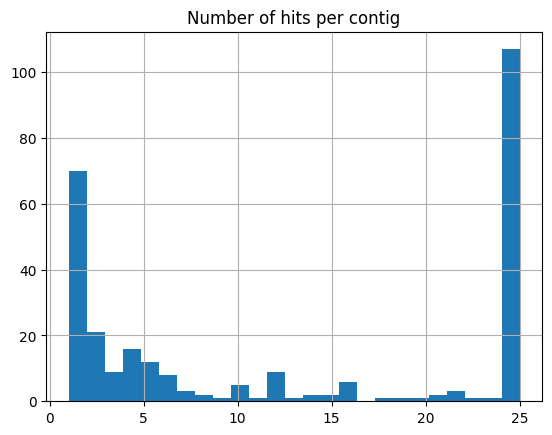

In [67]:
diamond.pivot_table(columns=['Query id'], aggfunc='size').hist(bins = 25)
plt.title("Number of hits per contig")

In this case, we are going to sort rows per e-value and score and get the most significant hit per each ContigId.

In [68]:
diamond = diamond.sort_values(
        by=['e-value', 'score'], ascending=[True, False]
        ).drop_duplicates(
    'Query id', keep='first'
).set_index('Query id')
diamond

,Subject id,% identity,alignment length,mismatches,gap openings,q. start,q. end,s. start,s. end,e-value,score
Query id,,,,,,,,,,,
TRINITY_DN2923_c0_g1_i1,7f5141b198adb3c5908b22433005b2b8,93.1,766,53,0,386,2683,1,766,0.000000e+00,1380.0
TRINITY_DN89013_c0_g1_i1,0e11793343040959188b651c69781b28,84.8,474,72,0,30,1451,1,474,8.920000e-306,833.0
TRINITY_DN10793_c0_g1_i1,5590f5b7af51fcb4b2c177b03b710cc7,91.3,448,39,0,1,1344,221,668,2.490000e-283,789.0
TRINITY_DN10932_c0_g1_i6,2289077753ad42da877b322205c9e6d1,91.9,422,34,0,96,1361,1,422,7.530000e-274,768.0
TRINITY_DN13226_c0_g2_i1,3694.POPTR_0001s33850.1,77.5,387,87,0,19,1179,1,387,5.510000e-230,639.0
...,...,...,...,...,...,...,...,...,...,...,...
TRINITY_DN37225_c0_g1_i1,5306.JGI99182,44.2,43,24,0,754,626,15,57,5.110000e-04,42.4
TRINITY_DN524225_c0_g1_i1,396513.Sca_2060,42.6,47,20,2,153,290,28,68,6.950000e-04,37.7
TRINITY_DN26706_c0_g1_i1,59689.fgenesh1_pm.C_scaffold_2001301,53.6,28,13,0,110,193,195,222,8.310000e-04,38.1


### Inspect E-values from aligned orthologous genes before filtering by e-value

array([[<Axes: title={'center': 'e-value'}>]], dtype=object)

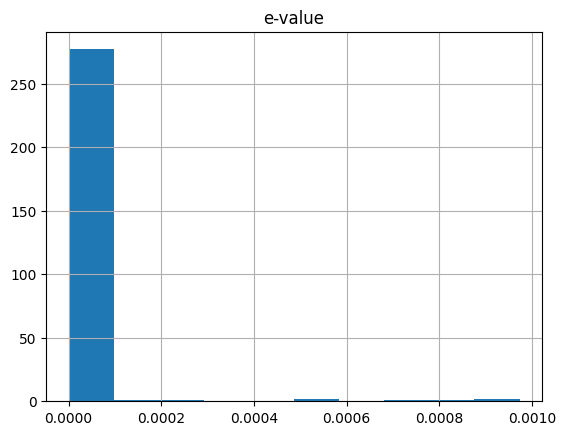

In [69]:
diamond.hist("e-value")

### Inspect E-values from aligned orthologous genes after filtering by e-value

We need to set a threshold:

In [70]:
evalue_threshold = 0.0001

In [71]:
diamond = diamond.loc[diamond['e-value'] < evalue_threshold] 

array([[<Axes: title={'center': 'e-value'}>]], dtype=object)

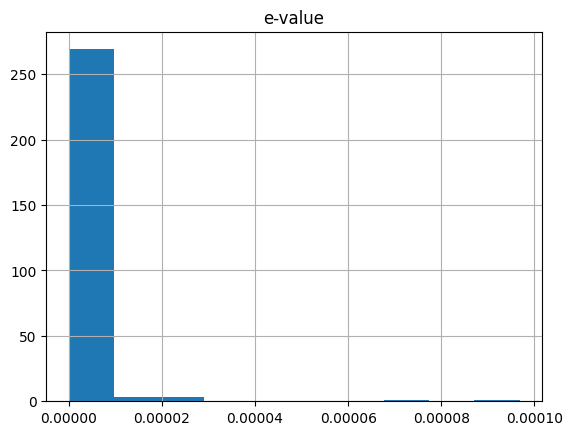

In [72]:
diamond.hist("e-value")

In [73]:
val = len(set(diamond["Subject id"]))
print(f"There are {val} unique orthologous genes")

There are 207 unique orthologous genes


### Inspect % identity and aligment length

array([[<Axes: title={'center': 'alignment length'}>]], dtype=object)

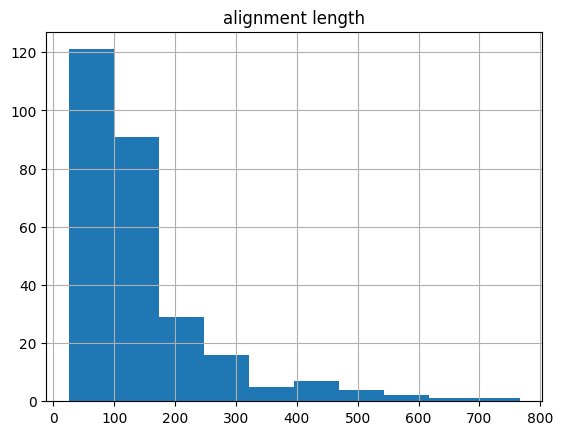

In [74]:
diamond.hist("alignment length")

array([[<Axes: title={'center': '% identity'}>]], dtype=object)

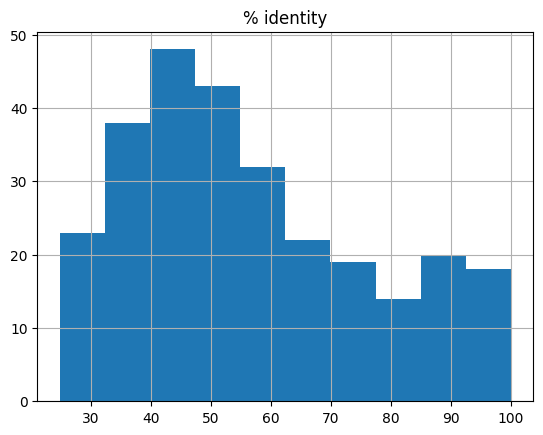

In [75]:
diamond.hist("% identity")

Text(0, 0.5, 'Mistmatches')

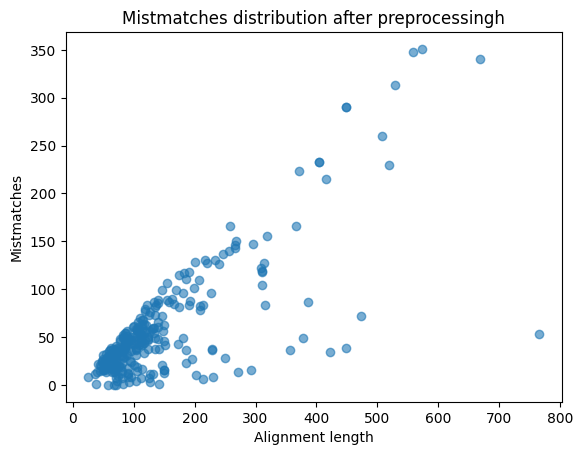

In [76]:
plt.scatter(diamond['alignment length'],diamond.mismatches,alpha=0.6)
plt.title('Mistmatches distribution after preprocessingh')
plt.xlabel('Alignment length')
plt.ylabel('Mistmatches')

## Attention !!
Please, consider the previous information to set the threshold for the e-value and the % identity.

### Merging aligned genes and count table
First, we are going to drop all columns except for ContigsID and orthologous genes header (to obtain map table). 

In [77]:
map_table = diamond[["Subject id"]]
map_table

,Subject id
Query id,
TRINITY_DN2923_c0_g1_i1,7f5141b198adb3c5908b22433005b2b8
TRINITY_DN89013_c0_g1_i1,0e11793343040959188b651c69781b28
TRINITY_DN10793_c0_g1_i1,5590f5b7af51fcb4b2c177b03b710cc7
TRINITY_DN10932_c0_g1_i6,2289077753ad42da877b322205c9e6d1
TRINITY_DN13226_c0_g2_i1,3694.POPTR_0001s33850.1
...,...
TRINITY_DN10108_c0_g1_i2,cf96547eee73d58ccef214566e8bf813
TRINITY_DN270089_c0_g1_i1,336252750
TRINITY_DN205806_c0_g1_i1,709797.CSIRO_4110


Now, we are going to merge both files by their column in common (ContigID and Subject id).

In [78]:
df = pd.merge(map_table, counts, left_index=True, right_index=True).reset_index(drop=True)
df

,Subject id,ML5,ML18,ML21,ML20,ML29,ML25,ML1,ML24,ML13,...,ML11,ML26,ML30,ML12,ML3,ML10,ML2,ML28,ML15,ML7
0,7f5141b198adb3c5908b22433005b2b8,59,171,18,28,273,192,15,291,31,...,8,61,242,9,11,23,10,119,59,144
1,0e11793343040959188b651c69781b28,34,83,0,0,26,111,10,10,14,...,8,16,68,15,7,5,23,0,29,25
2,5590f5b7af51fcb4b2c177b03b710cc7,31,36,0,0,9,13,15,6,11,...,7,7,3,11,14,9,18,4,13,23
3,2289077753ad42da877b322205c9e6d1,14,0,1,1,2,5,10,4,24,...,109,21,4,27,17,34,7,3,8,16
4,3694.POPTR_0001s33850.1,22,3,0,2,25,5,2,9,18,...,19,33,4,14,1,23,3,1,7,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,cf96547eee73d58ccef214566e8bf813,11,0,0,0,0,0,4,0,60,...,202,6,0,24,8,23,19,0,21,0
273,336252750,4,0,0,0,0,0,4,0,30,...,85,0,0,4,12,44,26,0,4,0
274,709797.CSIRO_4110,6,0,0,0,0,0,0,0,6,...,105,0,0,10,6,12,7,0,0,0
275,c281e838b1b5010063dbcab42dfc5127,4,24,0,0,0,26,6,0,10,...,16,34,0,8,0,16,6,2,36,6


### Aggregate table
Now, we are going to aggregate the rows by grouping by "Subject id" (notice the difference in rows between the previous table and the following):

In [79]:
df = df.groupby('Subject id').sum(numeric_only = True)
df

,ML5,ML18,ML21,ML20,ML29,ML25,ML1,ML24,ML13,ML19,...,ML11,ML26,ML30,ML12,ML3,ML10,ML2,ML28,ML15,ML7
Subject id,,,,,,,,,,,,,,,,,,,,,
00548989aad8aede98b100ebe823ca6b,18,49,0,0,13,22,16,5,2,0,...,8,5,1,13,16,7,12,0,24,19
070d7f3b771b97e44eeb756cf7d59e76,14,25,0,0,19,18,16,7,10,1,...,8,12,13,8,17,11,7,0,26,21
0a74228220ffd968bc5d8ebb73461132,14,31,0,0,9,16,27,6,12,1,...,7,11,5,7,15,9,17,1,24,12
0d72375ca2475601cb5c2068f08cbd85,8,6,0,0,2,8,11,0,4,2,...,14,20,0,6,12,14,14,2,8,4
0d90e501c401f78f7558f29d284ae381,26,0,0,0,0,0,0,0,30,2,...,2,46,0,2,0,234,0,0,0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
efcc57903f926b2e262253867b044fc1,45,58,0,0,39,37,42,32,38,0,...,2,7,7,6,33,13,16,0,54,27
f6aff9ec9612507891be67eb2649d7f0,0,0,20,29,0,0,0,0,0,6,...,0,0,0,0,0,0,0,4,0,0
f6f23579614b00ca9facc23a8a571609,51,3,0,4,1,4,26,0,70,22,...,30,10,3,24,25,41,30,0,61,10


## Annotating count table

The original annotation involves several files, and it's intricate. We will use the original script CoMW. 

In [80]:
df.reset_index(inplace=True)
df.rename(columns={"Subject id": "ContigID"}, inplace=True)
df.to_csv('NCyC_temp_count_table.tsv', sep="\t", index=False)
df

,ContigID,ML5,ML18,ML21,ML20,ML29,ML25,ML1,ML24,ML13,...,ML11,ML26,ML30,ML12,ML3,ML10,ML2,ML28,ML15,ML7
0,00548989aad8aede98b100ebe823ca6b,18,49,0,0,13,22,16,5,2,...,8,5,1,13,16,7,12,0,24,19
1,070d7f3b771b97e44eeb756cf7d59e76,14,25,0,0,19,18,16,7,10,...,8,12,13,8,17,11,7,0,26,21
2,0a74228220ffd968bc5d8ebb73461132,14,31,0,0,9,16,27,6,12,...,7,11,5,7,15,9,17,1,24,12
3,0d72375ca2475601cb5c2068f08cbd85,8,6,0,0,2,8,11,0,4,...,14,20,0,6,12,14,14,2,8,4
4,0d90e501c401f78f7558f29d284ae381,26,0,0,0,0,0,0,0,30,...,2,46,0,2,0,234,0,0,0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,efcc57903f926b2e262253867b044fc1,45,58,0,0,39,37,42,32,38,...,2,7,7,6,33,13,16,0,54,27
203,f6aff9ec9612507891be67eb2649d7f0,0,0,20,29,0,0,0,0,0,...,0,0,0,0,0,0,0,4,0,0
204,f6f23579614b00ca9facc23a8a571609,51,3,0,4,1,4,26,0,70,...,30,10,3,24,25,41,30,0,61,10
205,f7579edf19a252987be101e81b708a48,4,0,0,0,0,0,8,0,29,...,162,3,1,15,18,27,9,1,8,0


In [81]:
%%bash
python3 /software/CoMW/scripts/annotate_count_table.py -i ./NCyC_temp_count_table.tsv -o ./NCyC_temp_count_table_ann.tsv -d 3
rm NCyC_temp_count_table.tsv

/software/CoMW/scripts/annotate_count_table.py:331: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if db is 1:
/software/CoMW/scripts/annotate_count_table.py:333: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif db is 2:
/software/CoMW/scripts/annotate_count_table.py:335: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif db is 3:


In [82]:
df = pd.read_csv(
    "NCyC_temp_count_table_ann.tsv", sep = "\t",
)

In [83]:
%%bash
rm NCyC_temp_count_table_ann.tsv

In [84]:
df.rename(columns={"#ContigID": "ContigID"}, inplace=True)
df

,ContigID,ML5,ML18,ML21,ML20,ML29,ML25,ML1,ML24,ML13,...,ML26,ML30,ML12,ML3,ML10,ML2,ML28,ML15,ML7,Functions
0,00548989aad8aede98b100ebe823ca6b,18,49,0,0,13,22,16,5,2,...,5,1,13,16,7,12,0,24,19,DB__NCyc; LevelI__Assimilatory nitrate reducti...
1,070d7f3b771b97e44eeb756cf7d59e76,14,25,0,0,19,18,16,7,10,...,12,13,8,17,11,7,0,26,21,DB__NCyc; LevelI__Organic degradation and synt...
2,0a74228220ffd968bc5d8ebb73461132,14,31,0,0,9,16,27,6,12,...,11,5,7,15,9,17,1,24,12,DB__NCyc; LevelI__Denitrification; LevelII__ni...
3,0d72375ca2475601cb5c2068f08cbd85,8,6,0,0,2,8,11,0,4,...,20,0,6,12,14,14,2,8,4,DB__NCyc; LevelI__Denitrification; LevelII__ni...
4,0d90e501c401f78f7558f29d284ae381,26,0,0,0,0,0,0,0,30,...,46,0,2,0,234,0,0,0,12,DB__NCyc; LevelI__Organic degradation and synt...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,efcc57903f926b2e262253867b044fc1,45,58,0,0,39,37,42,32,38,...,7,7,6,33,13,16,0,54,27,DB__NCyc; LevelI__Denitrification; LevelII__ni...
209,f6aff9ec9612507891be67eb2649d7f0,0,0,20,29,0,0,0,0,0,...,0,0,0,0,0,0,4,0,0,DB__NCyc; LevelI__Denitrification; LevelII__ni...
210,f6f23579614b00ca9facc23a8a571609,51,3,0,4,1,4,26,0,70,...,10,3,24,25,41,30,0,61,10,DB__NCyc; LevelI__Denitrification; LevelII__ni...
211,f7579edf19a252987be101e81b708a48,4,0,0,0,0,0,8,0,29,...,3,1,15,18,27,9,1,8,0,DB__NCyc; LevelI__Others; LevelII__hcp; LevelI...


In [85]:
def parse_legacy_annotation(x):
    return tuple(y.split('__')[1] for y in x.split(";")[1:3])
df["Level1"], df["Level2"] = zip(*df["Functions"].map(parse_legacy_annotation))
df.drop(columns=["Functions"], inplace=True)

In [87]:
df

,ContigID,ML5,ML18,ML21,ML20,ML29,ML25,ML1,ML24,ML13,...,ML30,ML12,ML3,ML10,ML2,ML28,ML15,ML7,Level1,Level2
0,00548989aad8aede98b100ebe823ca6b,18,49,0,0,13,22,16,5,2,...,1,13,16,7,12,0,24,19,Assimilatory nitrate reduction,narB
1,070d7f3b771b97e44eeb756cf7d59e76,14,25,0,0,19,18,16,7,10,...,13,8,17,11,7,0,26,21,Organic degradation and synthesis,asnB
2,0a74228220ffd968bc5d8ebb73461132,14,31,0,0,9,16,27,6,12,...,5,7,15,9,17,1,24,12,Denitrification,nirK
3,0d72375ca2475601cb5c2068f08cbd85,8,6,0,0,2,8,11,0,4,...,0,6,12,14,14,2,8,4,Denitrification,nirK
4,0d90e501c401f78f7558f29d284ae381,26,0,0,0,0,0,0,0,30,...,0,2,0,234,0,0,0,12,Organic degradation and synthesis,ureB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,efcc57903f926b2e262253867b044fc1,45,58,0,0,39,37,42,32,38,...,7,6,33,13,16,0,54,27,Denitrification,nirS
209,f6aff9ec9612507891be67eb2649d7f0,0,0,20,29,0,0,0,0,0,...,0,0,0,0,0,4,0,0,Denitrification,nirS
210,f6f23579614b00ca9facc23a8a571609,51,3,0,4,1,4,26,0,70,...,3,24,25,41,30,0,61,10,Denitrification,nirS
211,f7579edf19a252987be101e81b708a48,4,0,0,0,0,0,8,0,29,...,1,15,18,27,9,1,8,0,Others,hcp


In [86]:
df.to_csv('NCyc_counttable_annotated.tsv', sep="\t", index=False)